In [1]:
pip install openl3

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 252.5 MB 12.4 MB/s eta 0:00:01
  distutils: /private/var/folders/rn/f4qndbw575xf4jy30d6v7c_w0000gn/T/pip-build-env-6r7xhr38/normal/lib/python3.9/site-packages
  sysconfig: /Library/Python/3.9/site-packages
  distutils: /private/var/folders/rn/f4qndbw575xf4jy30d6v7c_w0000gn/T/pip-build-env-6r7xhr38/normal/lib/python3.9/site-packages
  sysconfig: /Library/Python/3.9/site-packages
  user = False
  home = None
  root = None
  prefix = '/private/var/folders/rn/f4qndbw575xf4jy30d6v7c_w0000gn/T/pip-build-env-6r7xhr38/normal'
  distutils: /private/var/folders/rn/f4qndbw575xf4jy30d6v7c_w0000gn/T/pip-build-env-6r7xhr38/overlay/lib/python3.9/site-packages
  sysconfig: /Library/Python/3.9/site-packages
  distutils: /private/var/folders/rn/f4qndbw575xf4jy30d6v7c_w0000gn/T/pip-build-env-6r7xhr38/overlay/lib/python3.9/site-packages
  sysconfig: /Library/Python/3.9/site-packages
  user

[INFO] Extracting OpenL3 embeddings...
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 962ms/step
[INFO] Got 198 embeddings of size 512
[INFO] Running t-SNE...


/Users/yashavula/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


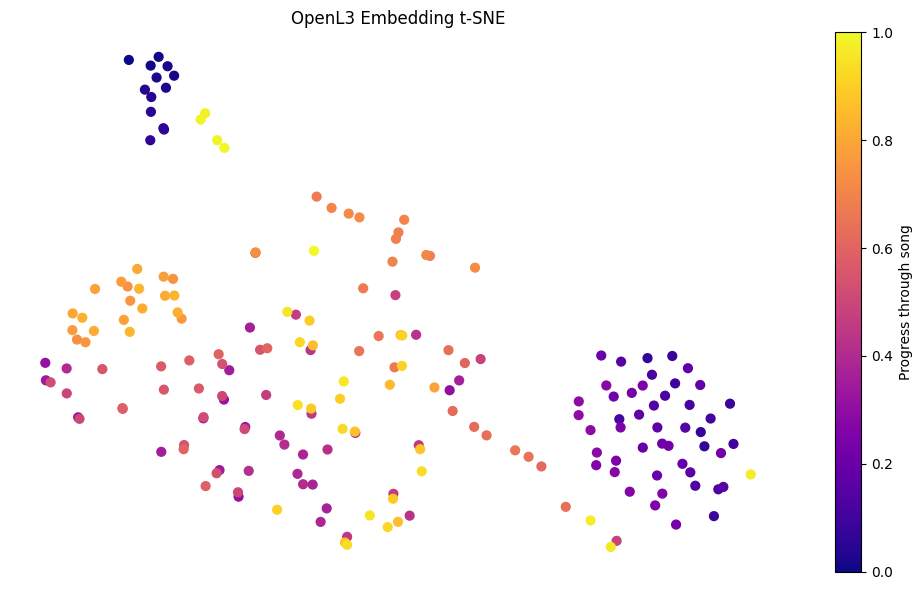

In [3]:
import openl3
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tqdm import tqdm

# === CONFIG ===
AUDIO_PATH = '/Users/yashavula/Downloads/More More More.wav'
CONTENT_TYPE = "music"     # or "env"
EMBEDDING_SIZE = 512       # 512 or 6144
HOP_SIZE = 1.0              # seconds per embedding (adjust for granularity)

# === LOAD AUDIO ===
audio, sr = sf.read(AUDIO_PATH)
if audio.ndim > 1:
    audio = audio.mean(axis=1)  # Mono

# === EXTRACT EMBEDDINGS ===
print("[INFO] Extracting OpenL3 embeddings...")
embeddings, timestamps = openl3.get_audio_embedding(
    audio, sr, content_type=CONTENT_TYPE,
    embedding_size=EMBEDDING_SIZE,
    hop_size=HOP_SIZE, center=True
)

print(f"[INFO] Got {len(embeddings)} embeddings of size {embeddings.shape[1]}")

# === t-SNE VISUALIZATION ===
print("[INFO] Running t-SNE...")
tsne = TSNE(n_components=2, perplexity=30, init='pca', n_iter=5000)
projected = tsne.fit_transform(embeddings)

# === PLOT ===
plt.figure(figsize=(10, 6))
plt.scatter(projected[:, 0], projected[:, 1],
            c=np.linspace(0, 1, len(projected)),
            cmap='plasma', s=40)
plt.title("OpenL3 Embedding t-SNE")
plt.axis('off')
plt.colorbar(label="Progress through song")
plt.tight_layout()
plt.savefig("openl3_tsne_visualization.png", dpi=300)
plt.show()